# Table of Contents
* [Description](#Description)
* [Import](#Import)
* [Select Vacuum Furnace File](#Select-Vacuum-Furnace-File)
	* [convert to pandas time format](#convert-to-pandas-time-format)
	* [convert to time stamp](#convert-to-time-stamp)
* [Output the temperature spectrum](#Output-the-temperature-spectrum)


# Description 

**<span style="color:red">IMPORTANT</span>** All cells can be run at once  ---->   **  Cell > Run All **

This notebook will parse the complex Vacuum Furnace file and will only retrieve the time_stamp and the temperature. 

**NB** This notebook only needs to be ran once for a given Vacuum Furnace File. 


**Vacuum_Furnace.txt**
```
9/2/2015  4:29:19 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	8.000000	OT Temp	107.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	95.000000	
9/2/2015  4:29:41 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	3.000000	OT Temp	109.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	99.000000	
9/2/2015  4:30:03 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	5.000000	OT Temp	111.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	103.000000	
9/2/2015  4:30:25 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	8.000000	OT Temp	113.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	104.000000	
9/2/2015  4:30:46 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	8.000000	OT Temp	114.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	106.000000	
9/2/2015  4:31:10 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	4.000000	OT Temp	119.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	111.000000	
9/2/2015  4:31:32 PM	furnacevacuum2 	0.000000	furnacevacuum1 	0.000000	Tolerance 	10.000000	%Power 	7.000000	OT Temp	123.000000	Ramp SP 	500.000000	OT SP 	1450.000000	Setpoint 	500.000000	Sample 	113.000000

...

```

An ascii file with those infos will be created and will be used by the step3 notebook

The following comma separated file will be created

**temperature_spectrum.csv**
```
1441225042.0,22.0
1441225064.0,22.0
1441225086.0,22.0
1441225107.0,22.0
1441225129.0,22.0
1441225151.0,22.0
1441225172.0,22.0
1441225194.0,22.0
1441225216.0,22.0
1441225238.0,22.0
1441225259.0,22.0
1441225281.0,22.0
1441225303.0,22.0
1441225325.0,23.0
1441225346.0,25.0
1441225368.0,27.0
1441225390.0,30.0
1441225412.0,33.0
1441225433.0,36.0
1441225455.0,40.0
1441225477.0,43.0
1441225499.0,47.0
1441225520.0,51.0
1441225542.0,54.0
1441225564.0,57.0
1441225586.0,62.0
...
```

where the first column is the time stamp in seconds since 1970 (this is a scale used to match file and furnace time), and the second column is the Temperature of the Furnace.

# Import 

In [1]:
import sys
print(sys.platform)

In [2]:
verbose = True

import time
import datetime
import os
import glob
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib notebook

import pandas as pd
import numpy as np

from ipywidgets import widgets
from IPython.display import display

import config_handler
import time_utility
import file_handler

import sys

if sys.platform == 'darwin':
    my_system = 'mac'
elif sys.platform == 'win32':
    my_system = 'windows'

# Import Vacuum Furnace File 

Before removing empty columns
                  index  NaN  furnace\ vacuum2  NaN  furnace\ vacuum1  NaN  \
0  9/2/2015  4:17:22 PM  NaN               0.0  NaN               0.0  NaN   
1  9/2/2015  4:17:44 PM  NaN               0.0  NaN               0.0  NaN   
2  9/2/2015  4:18:06 PM  NaN               0.0  NaN               0.0  NaN   
3  9/2/2015  4:18:27 PM  NaN               0.0  NaN               0.0  NaN   
4  9/2/2015  4:18:49 PM  NaN               0.0  NaN               0.0  NaN   

   tolerance  NaN  %power  NaN  OT\ Temp  NaN  Ramp\ SP  NaN  OT\ SP  NaN  \
0       10.0  NaN     0.0  NaN      22.0  NaN     500.0  NaN  1450.0  NaN   
1       10.0  NaN     0.0  NaN      22.0  NaN     500.0  NaN  1450.0  NaN   
2       10.0  NaN     0.0  NaN      22.0  NaN     500.0  NaN  1450.0  NaN   
3       10.0  NaN     0.0  NaN      22.0  NaN     500.0  NaN  1450.0  NaN   
4       10.0  NaN     0.0  NaN      22.0  NaN     500.0  NaN  1450.0  NaN   

   Setpoint  NaN  Sample  NaN  
0     

<IPython.core.display.Javascript object>


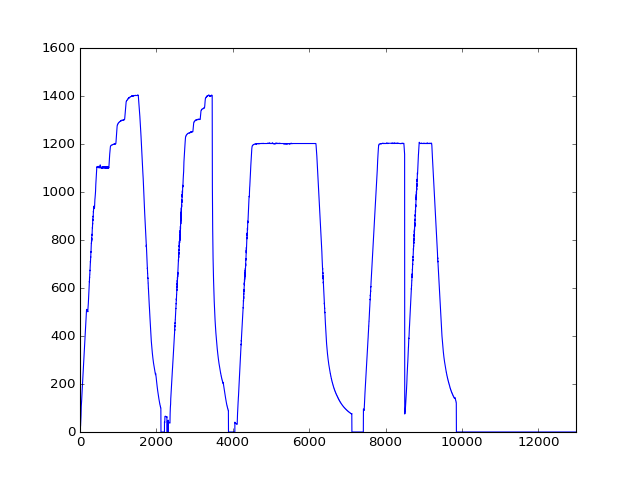

In [3]:
temperature_file = 'Vacuum_Furnace.txt'
furnace_file_folder = config_handler.load_config(key = 'furnace_file_folder')
full_temperature_file = os.path.join(furnace_file_folder, temperature_file)

if my_system == 'mac':
    my_header = [None, "furnace vacuum2", None, "furnace vacuum1", None, "tolerance",
                None, "%power", None, "OT Temp", None, "Ramp SP", None,
                "OT SP", None, "Setpoint", None, "Sample", None]
else:
    my_header = [None, "furnace\ vacuum2", None, "furnace\ vacuum1", None, "tolerance",
                None, "%power", None, "OT\ Temp", None, "Ramp\ SP", None,
                "OT\ SP", None, "Setpoint", None, "Sample", None]
    
df = pd.read_csv(full_temperature_file, sep='\t', names=my_header)
df = df.reset_index()

if verbose:
    print("Before removing empty columns")
#    pprint(df.info())
    pprint(df.head())

try:
    del df[None] #removing empty columns
except:
    pass

if verbose:
    print("After removing empty columns")
    pprint(df.head())

# removing useless columns
if my_system == 'mac':
    new_df = df.drop(df.columns[[1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18]], axis=1)
else:
    new_df = df[['index','OT\ Temp']]
    
if verbose:
    pprint(new_df.head())
    fig = plt.figure()
    if my_system == 'mac':
        df['OT Temp'].plot()
    else:
        df['OT\ Temp'].plot()

## convert to pandas time format 

In [4]:
new_df['index'] = pd.to_datetime(new_df['index'])
if verbose:
    pprint(new_df.head())

                index  OT\ Temp
0 2015-09-02 16:17:22      22.0
1 2015-09-02 16:17:44      22.0
2 2015-09-02 16:18:06      22.0
3 2015-09-02 16:18:27      22.0
4 2015-09-02 16:18:49      22.0


C:\Users\j35\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## convert to time stamp 

In [5]:
def conv(x):
    return time.mktime(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").timetuple())

new_df_2 = new_df
new_df_2['index'] = new_df['index'].apply(conv)

if verbose:
    pprint(new_df_2.head())

          index  OT\ Temp
0  1.441225e+09      22.0
1  1.441225e+09      22.0
2  1.441225e+09      22.0
3  1.441225e+09      22.0
4  1.441225e+09      22.0


C:\Users\j35\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Output the temperature spectrum 

          index  OT\ Temp
0  1.441225e+09      22.0
1  1.441225e+09      22.0
2  1.441225e+09      22.0
3  1.441225e+09      22.0
4  1.441225e+09      22.0


<IPython.core.display.Javascript object>


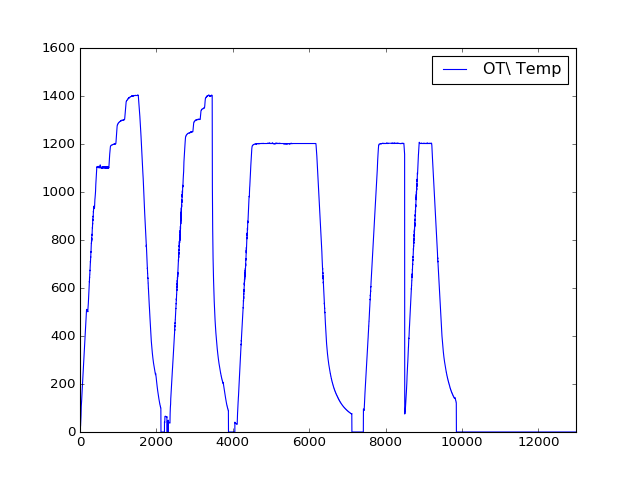

In [6]:
new_df = new_df_2.set_index('index')

output_folder = config_handler.load_config(key = 'output_folder')
output_file = os.path.join(output_folder, 'temperature_spectrum.csv')
new_df.to_csv(output_file, header=False)

if verbose:
    pprint(new_df_2.head())
    if my_system == 'mac':
        pprint(new_df_2.plot(y='OT Temp'))
    else:
        pprint(new_df_2.plot(y='OT\ Temp'))